In [3]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第三位まで表示
%precision 3

'%.3f'

In [2]:
# データやモデルを構築するためのライブラリなどのインポート
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
# インポート
import requests, zipfile
import io

# キノコデータを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)


In [4]:
# データの列にラベルを設定
mushroom.columns = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 
                    'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
                    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
                    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
                    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 

In [5]:
mushroom_dummy = pd.get_dummies(mushroom[['gill-color', 'gill-attachment', 'odor', 'cap-color']])
# 目的変数もフラグ化(0/1)する
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x: 1 if x == 'p' else 0)

In [8]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    mushroom_dummy.drop('flg', axis=1), mushroom_dummy['flg'], random_state = 50)

In [9]:
# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

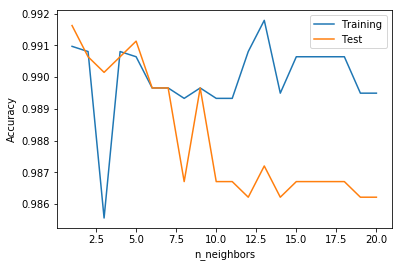

In [10]:
# グラフを描画
plt.plot(range(1, 21), training_accuracy, label='Training')
plt.plot(range(1, 21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

Wall time: 29.1 s


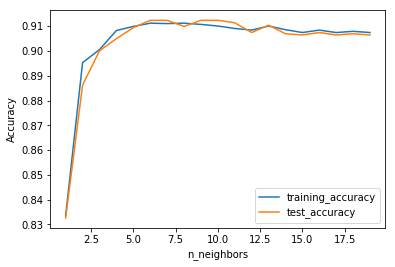

In [12]:
%%time

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns = [
    'classes', 'cap-shape', 'cap-surface', 'cap-color', 'odor', 'bruises', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
] 

mush_dummy = pd.get_dummies(mush[['gill-color', 'gill-attachment', 'odor', 'cap-color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x == 'p' else 0)

from sklearn.neighbors import KNeighborsClassifier

# 説明変数と目的変数
X = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

Wall time: 124 ms


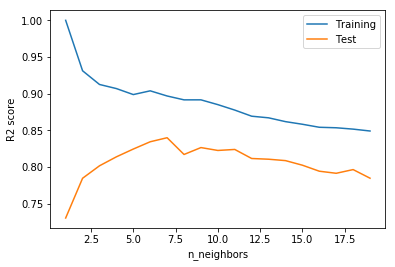

In [4]:
%%time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

student = pd.read_csv('student-mat.csv', sep = ';')
X = student.loc[:,['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                  'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
                  'absences', 'G1', 'G2']].values

# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, student.G3, random_state = 0)

scores_train = []
scores_test = []
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))

plt.plot(neighbors_settings, scores_train, label='Training')
plt.plot(neighbors_settings, scores_test, label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()